<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install autogluon

     |████████████████████████████████| 273 kB 6.6 MB/s 
     |████████████████████████████████| 352 kB 55.4 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 4.2 MB 37.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 27.4 MB 54.7 MB/s 
     |████████████████████████████████| 131 kB 46.6 MB/s 
     |████████████████████████████████| 210 kB 50.6 MB/s 
     |████████████████████████████████| 802 kB 56.7 MB/s 
     |████████████████████████████████| 119 kB 62.4 MB/s 
     |████████████████████████████████| 1.3 MB 47.3 MB/s 
     |████████████████████████████████| 3.0 MB 55.5 MB/s 
     |████████████████████████████████| 296 kB 70.7 MB/s 
     |████████████████████████████████| 189 kB 76.1 MB/s 
     |████████████████████████████████| 2.0 MB 48.8 MB/s 
     |████████████████████████████████| 166.7 MB 19 kB/s 
     |████████████

In [4]:
!pip install --upgrade mxnet

     |████████████████████████████████| 47.3 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [5]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [6]:
#metatrader5 file format
df=pd.read_csv('/content/EURUSD_M1_202001020600_202201100721.csv')

In [7]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2020.01.02\t06:00:00\t1.12132\t1.12133\t1.1212...                        
1  2020.01.02\t06:01:00\t1.12131\t1.12133\t1.1213...                        
2  2020.01.02\t06:02:00\t1.12132\t1.12133\t1.1213...                        
3  2020.01.02\t06:03:00\t1.12132\t1.12134\t1.1213...                        
4  2020.01.02\t06:04:00\t1.12132\t1.12133\t1.1213...                        
       <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
753817  2022.01.10\t07:17:00\t1.13349\t1.13354\t1.1334...                        
753818  2022.01.10\t07:18:00\t1.13354\t1.13355\t1.1335...                        
753819  2022.01.10\t07:19:00\t1.13352\t1.13352\t1.1334...                        
753820  2022.01.10\t07:20:00\t1.13348\t1.13350\t1.1334...                        
753821  2022.01.10\t07:21:00\t1.13349\t1.13349\t1.1334...                        
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [8]:
df.columns=['header']


In [9]:
df = df.header.str.split('\t', expand=True)


In [10]:
df

,0,1,2,3,4,5,6,7,8
0,2020.01.02,06:00:00,1.12132,1.12133,1.12128,1.12131,14,0,3
1,2020.01.02,06:01:00,1.12131,1.12133,1.12131,1.12132,16,0,4
2,2020.01.02,06:02:00,1.12132,1.12133,1.12131,1.12132,9,0,3
3,2020.01.02,06:03:00,1.12132,1.12134,1.12132,1.12132,19,0,3
4,2020.01.02,06:04:00,1.12132,1.12133,1.12132,1.12132,3,0,4
...,...,...,...,...,...,...,...,...,...
753817,2022.01.10,07:17:00,1.13349,1.13354,1.13349,1.13352,6,0,1
753818,2022.01.10,07:18:00,1.13354,1.13355,1.13352,1.13354,8,0,1
753819,2022.01.10,07:19:00,1.13352,1.13352,1.13349,1.13349,4,0,1
753820,2022.01.10,07:20:00,1.13348,1.13350,1.13348,1.13349,8,0,0


In [11]:
df_close_col = pd.DataFrame(data=df.iloc[:,5].tail(576000))

In [12]:
df_close_col

,5
177822,1.13093
177823,1.13095
177824,1.13078
177825,1.13096
177826,1.13088
...,...
753817,1.13352
753818,1.13354
753819,1.13349
753820,1.13349


In [13]:
df_close_col[5] = df_close_col[5].astype(float, errors = 'raise')

In [14]:
df_close_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576000 entries, 177822 to 753821
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   5       576000 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB


In [15]:
df_close_col.isnull().sum()

5    0
dtype: int64

In [48]:
###df80 to df120###
df120 = pd.DataFrame(data=df_close_col.iloc[-172800:-171360])
df120['row_num']=np.arange(len(df120))
df120.set_index('row_num',inplace=True)
df120 = df120.rename(columns={5:'day_120'})
print(df120)

df119 = pd.DataFrame(data=df_close_col.iloc[-171360:-169920])
df119['row_num']=np.arange(len(df119))
df119.set_index('row_num',inplace=True)
df119 = df119.rename(columns={5:'day_119'})
print(df119)

df118 = pd.DataFrame(data=df_close_col.iloc[-169920:-168480])
df118['row_num']=np.arange(len(df118))
df118.set_index('row_num',inplace=True)
df118 = df118.rename(columns={5:'day_118'})
print(df118)

df117 = pd.DataFrame(data=df_close_col.iloc[-168480:-167040])
df117['row_num']=np.arange(len(df117))
df117.set_index('row_num',inplace=True)
df117 = df117.rename(columns={5:'day_117'})
print(df117)

df116 = pd.DataFrame(data=df_close_col.iloc[-167040:-165600])
df116['row_num']=np.arange(len(df116))
df116.set_index('row_num',inplace=True)
df116 = df116.rename(columns={5:'day_116'})
print(df116)

df115 = pd.DataFrame(data=df_close_col.iloc[-165600:-164160])
df115['row_num']=np.arange(len(df115))
df115.set_index('row_num',inplace=True)
df115 = df115.rename(columns={5:'day_115'})
print(df115)

df114 = pd.DataFrame(data=df_close_col.iloc[-164160:-162720])
df114['row_num']=np.arange(len(df114))
df114.set_index('row_num',inplace=True)
df114 = df114.rename(columns={5:'day_114'})
print(df114)

df113 = pd.DataFrame(data=df_close_col.iloc[-162720:-161280])
df113['row_num']=np.arange(len(df113))
df113.set_index('row_num',inplace=True)
df113 = df113.rename(columns={5:'day_113'})
print(df113)

df112 = pd.DataFrame(data=df_close_col.iloc[-161280:-159840])
df112['row_num']=np.arange(len(df112))
df112.set_index('row_num',inplace=True)
df112 = df112.rename(columns={5:'day_112'})
print(df112)

df111 = pd.DataFrame(data=df_close_col.iloc[-159840:-158400])
df111['row_num']=np.arange(len(df111))
df111.set_index('row_num',inplace=True)
df111 = df111.rename(columns={5:'day_111'})
print(df111)

df110 = pd.DataFrame(data=df_close_col.iloc[-158400:-156960])
df110['row_num']=np.arange(len(df110))
df110.set_index('row_num',inplace=True)
df110 = df110.rename(columns={5:'day_110'})
print(df110)

df109 = pd.DataFrame(data=df_close_col.iloc[-156960:-155520])
df109['row_num']=np.arange(len(df109))
df109.set_index('row_num',inplace=True)
df109 = df109.rename(columns={5:'day_109'})
print(df109)

df108 = pd.DataFrame(data=df_close_col.iloc[-155520:-154080])
df108['row_num']=np.arange(len(df108))
df108.set_index('row_num',inplace=True)
df108 = df108.rename(columns={5:'day_108'})
print(df108)

df107 = pd.DataFrame(data=df_close_col.iloc[-154080:-152640])
df107['row_num']=np.arange(len(df107))
df107.set_index('row_num',inplace=True)
df107 = df107.rename(columns={5:'day_107'})
print(df107)

df106 = pd.DataFrame(data=df_close_col.iloc[-152640:-151200])
df106['row_num']=np.arange(len(df106))
df106.set_index('row_num',inplace=True)
df106 = df106.rename(columns={5:'day_106'})
print(df106)

df105 = pd.DataFrame(data=df_close_col.iloc[-151200:-149760])
df105['row_num']=np.arange(len(df105))
df105.set_index('row_num',inplace=True)
df105 = df105.rename(columns={5:'day_105'})
print(df105)

df104 = pd.DataFrame(data=df_close_col.iloc[-149760:-148320])
df104['row_num']=np.arange(len(df104))
df104.set_index('row_num',inplace=True)
df104 = df104.rename(columns={5:'day_104'})
print(df104)

df103 = pd.DataFrame(data=df_close_col.iloc[-148320:-146880])
df103['row_num']=np.arange(len(df103))
df103.set_index('row_num',inplace=True)
df103 = df103.rename(columns={5:'day_103'})
print(df103)

df102 = pd.DataFrame(data=df_close_col.iloc[-146880:-145440])
df102['row_num']=np.arange(len(df102))
df102.set_index('row_num',inplace=True)
df102 = df102.rename(columns={5:'day_102'})
print(df102)

df101 = pd.DataFrame(data=df_close_col.iloc[-145440:-144000])
df101['row_num']=np.arange(len(df101))
df101.set_index('row_num',inplace=True)
df101 = df101.rename(columns={5:'day_101'})
print(df101)


df100 = pd.DataFrame(data=df_close_col.iloc[-144000:-142560])
df100['row_num']=np.arange(len(df100))
df100.set_index('row_num',inplace=True)
df100 = df100.rename(columns={5:'day_100'})
print(df100)

df99 = pd.DataFrame(data=df_close_col.iloc[-142560:-141120])
df99['row_num']=np.arange(len(df99))
df99.set_index('row_num',inplace=True)
df99 = df99.rename(columns={5:'day_99'})
print(df99)

df98 = pd.DataFrame(data=df_close_col.iloc[-141120:-139680])
df98['row_num']=np.arange(len(df98))
df98.set_index('row_num',inplace=True)
df98 = df98.rename(columns={5:'day_98'})
print(df98)

df97 = pd.DataFrame(data=df_close_col.iloc[-139680:-138240])
df97['row_num']=np.arange(len(df97))
df97.set_index('row_num',inplace=True)
df97 = df97.rename(columns={5:'day_97'})
print(df97)

df96 = pd.DataFrame(data=df_close_col.iloc[-138240:-136800])
df96['row_num']=np.arange(len(df96))
df96.set_index('row_num',inplace=True)
df96 = df96.rename(columns={5:'day_96'})
print(df96)

df95 = pd.DataFrame(data=df_close_col.iloc[-136800:-135360])
df95['row_num']=np.arange(len(df95))
df95.set_index('row_num',inplace=True)
df95 = df95.rename(columns={5:'day_95'})
print(df95)

df94 = pd.DataFrame(data=df_close_col.iloc[-135360:-133920])
df94['row_num']=np.arange(len(df94))
df94.set_index('row_num',inplace=True)
df94 = df94.rename(columns={5:'day_94'})
print(df94)

df93 = pd.DataFrame(data=df_close_col.iloc[-133920:-132480])
df93['row_num']=np.arange(len(df93))
df93.set_index('row_num',inplace=True)
df93 = df93.rename(columns={5:'day_93'})
print(df93)

df92 = pd.DataFrame(data=df_close_col.iloc[-132480:-131040])
df92['row_num']=np.arange(len(df92))
df92.set_index('row_num',inplace=True)
df92 = df92.rename(columns={5:'day_92'})
print(df92)

df91 = pd.DataFrame(data=df_close_col.iloc[-131040:-129600])
df91['row_num']=np.arange(len(df91))
df91.set_index('row_num',inplace=True)
df91 = df91.rename(columns={5:'day_91'})
print(df91)

df90 = pd.DataFrame(data=df_close_col.iloc[-129600:-128160])
df90['row_num']=np.arange(len(df90))
df90.set_index('row_num',inplace=True)
df90 = df90.rename(columns={5:'day_90'})
print(df90)

df89 = pd.DataFrame(data=df_close_col.iloc[-128160:-126720])
df89['row_num']=np.arange(len(df89))
df89.set_index('row_num',inplace=True)
df89 = df89.rename(columns={5:'day_89'})
print(df89)

df88 = pd.DataFrame(data=df_close_col.iloc[-126720:-125280])
df88['row_num']=np.arange(len(df88))
df88.set_index('row_num',inplace=True)
df88 = df88.rename(columns={5:'day_88'})
print(df88)

df87 = pd.DataFrame(data=df_close_col.iloc[-125280:-123840])
df87['row_num']=np.arange(len(df87))
df87.set_index('row_num',inplace=True)
df87 = df87.rename(columns={5:'day_87'})
print(df87)

df86 = pd.DataFrame(data=df_close_col.iloc[-123840:-122400])
df86['row_num']=np.arange(len(df86))
df86.set_index('row_num',inplace=True)
df86 = df86.rename(columns={5:'day_86'})
print(df86)

df85 = pd.DataFrame(data=df_close_col.iloc[-122400:-120960])
df85['row_num']=np.arange(len(df85))
df85.set_index('row_num',inplace=True)
df85 = df85.rename(columns={5:'day_85'})
print(df85)

df84 = pd.DataFrame(data=df_close_col.iloc[-120960:-119520])
df84['row_num']=np.arange(len(df84))
df84.set_index('row_num',inplace=True)
df84 = df84.rename(columns={5:'day_84'})
print(df84)

df83 = pd.DataFrame(data=df_close_col.iloc[-119520:-118080])
df83['row_num']=np.arange(len(df83))
df83.set_index('row_num',inplace=True)
df83 = df83.rename(columns={5:'day_83'})
print(df83)

df82 = pd.DataFrame(data=df_close_col.iloc[-118080:-116640])
df82['row_num']=np.arange(len(df82))
df82.set_index('row_num',inplace=True)
df82 = df82.rename(columns={5:'day_82'})
print(df82)

df81 = pd.DataFrame(data=df_close_col.iloc[-116640:-115200])
df81['row_num']=np.arange(len(df81))
df81.set_index('row_num',inplace=True)
df81 = df81.rename(columns={5:'day_81'})
print(df81)
###df80 to df 120###

         day_120
row_num         
0        1.17746
1        1.17748
2        1.17746
3        1.17747
4        1.17748
...          ...
1435     1.18002
1436     1.18006
1437     1.18008
1438     1.18002
1439     1.18007

[1440 rows x 1 columns]
         day_119
row_num         
0        1.18006
1        1.18007
2        1.18017
3        1.18018
4        1.18007
...          ...
1435     1.18198
1436     1.18193
1437     1.18193
1438     1.18198
1439     1.18195

[1440 rows x 1 columns]
         day_118
row_num         
0        1.18197
1        1.18207
2        1.18199
3        1.18192
4        1.18198
...          ...
1435     1.18415
1436     1.18413
1437     1.18424
1438     1.18429
1439     1.18438

[1440 rows x 1 columns]
         day_117
row_num         
0        1.18447
1        1.18449
2        1.18452
3        1.18448
4        1.18437
...          ...
1435     1.18885
1436     1.18884
1437     1.18881
1438     1.18881
1439     1.18875

[1440 rows x 1 columns]
         day_116

In [49]:
###df40 to df80###
df80 = pd.DataFrame(data=df_close_col.iloc[-115200:-113760])
df80['row_num']=np.arange(len(df80))
df80.set_index('row_num',inplace=True)
df80 = df80.rename(columns={5:'day_80'})
print(df80)

df79 = pd.DataFrame(data=df_close_col.iloc[-113760:-112320])
df79['row_num']=np.arange(len(df79))
df79.set_index('row_num',inplace=True)
df79 = df79.rename(columns={5:'day_79'})
print(df79)

df78 = pd.DataFrame(data=df_close_col.iloc[-112320:-110880])
df78['row_num']=np.arange(len(df78))
df78.set_index('row_num',inplace=True)
df78 = df78.rename(columns={5:'day_78'})
print(df78)

df77 = pd.DataFrame(data=df_close_col.iloc[-110880:-109440])
df77['row_num']=np.arange(len(df77))
df77.set_index('row_num',inplace=True)
df77 = df77.rename(columns={5:'day_77'})
print(df77)

df76 = pd.DataFrame(data=df_close_col.iloc[-109440:-108000])
df76['row_num']=np.arange(len(df76))
df76.set_index('row_num',inplace=True)
df76 = df76.rename(columns={5:'day_76'})
print(df76)

df75 = pd.DataFrame(data=df_close_col.iloc[-108000:-106560])
df75['row_num']=np.arange(len(df75))
df75.set_index('row_num',inplace=True)
df75 = df75.rename(columns={5:'day_75'})
print(df75)

df74 = pd.DataFrame(data=df_close_col.iloc[-106560:-105120])
df74['row_num']=np.arange(len(df74))
df74.set_index('row_num',inplace=True)
df74 = df74.rename(columns={5:'day_74'})
print(df74)

df73 = pd.DataFrame(data=df_close_col.iloc[-105120:-103680])
df73['row_num']=np.arange(len(df73))
df73.set_index('row_num',inplace=True)
df73 = df73.rename(columns={5:'day_73'})
print(df73)

df72 = pd.DataFrame(data=df_close_col.iloc[-103680:-102240])
df72['row_num']=np.arange(len(df72))
df72.set_index('row_num',inplace=True)
df72 = df72.rename(columns={5:'day_72'})
print(df72)

df71 = pd.DataFrame(data=df_close_col.iloc[-102240:-100800])
df71['row_num']=np.arange(len(df71))
df71.set_index('row_num',inplace=True)
df71 = df71.rename(columns={5:'day_71'})
print(df71)

df70 = pd.DataFrame(data=df_close_col.iloc[-100800:-99360])
df70['row_num']=np.arange(len(df70))
df70.set_index('row_num',inplace=True)
df70 = df70.rename(columns={5:'day_70'})
print(df70)

df69 = pd.DataFrame(data=df_close_col.iloc[-99360:-97920])
df69['row_num']=np.arange(len(df69))
df69.set_index('row_num',inplace=True)
df69 = df69.rename(columns={5:'day_69'})
print(df69)

df68 = pd.DataFrame(data=df_close_col.iloc[-97920:-96480])
df68['row_num']=np.arange(len(df68))
df68.set_index('row_num',inplace=True)
df68 = df68.rename(columns={5:'day_68'})
print(df68)

df67 = pd.DataFrame(data=df_close_col.iloc[-96480:-95040])
df67['row_num']=np.arange(len(df67))
df67.set_index('row_num',inplace=True)
df67 = df67.rename(columns={5:'day_67'})
print(df67)

df66 = pd.DataFrame(data=df_close_col.iloc[-95040:-93600])
df66['row_num']=np.arange(len(df66))
df66.set_index('row_num',inplace=True)
df66 = df66.rename(columns={5:'day_66'})
print(df66)

df65 = pd.DataFrame(data=df_close_col.iloc[-93600:-92160])
df65['row_num']=np.arange(len(df65))
df65.set_index('row_num',inplace=True)
df65 = df65.rename(columns={5:'day_65'})
print(df65)

df64 = pd.DataFrame(data=df_close_col.iloc[-92160:-90720])
df64['row_num']=np.arange(len(df64))
df64.set_index('row_num',inplace=True)
df64 = df64.rename(columns={5:'day_64'})
print(df64)

df63 = pd.DataFrame(data=df_close_col.iloc[-90720:-89280])
df63['row_num']=np.arange(len(df63))
df63.set_index('row_num',inplace=True)
df63 = df63.rename(columns={5:'day_63'})
print(df63)

df62 = pd.DataFrame(data=df_close_col.iloc[-89280:-87840])
df62['row_num']=np.arange(len(df62))
df62.set_index('row_num',inplace=True)
df62 = df62.rename(columns={5:'day_62'})
print(df62)

df61 = pd.DataFrame(data=df_close_col.iloc[-87840:-86400])
df61['row_num']=np.arange(len(df61))
df61.set_index('row_num',inplace=True)
df61 = df61.rename(columns={5:'day_61'})
print(df61)


df60 = pd.DataFrame(data=df_close_col.iloc[-86400:-84960])
df60['row_num']=np.arange(len(df60))
df60.set_index('row_num',inplace=True)
df60 = df60.rename(columns={5:'day_60'})
print(df60)

df59 = pd.DataFrame(data=df_close_col.iloc[-84960:-83520])
df59['row_num']=np.arange(len(df59))
df59.set_index('row_num',inplace=True)
df59 = df59.rename(columns={5:'day_59'})
print(df59)

df58 = pd.DataFrame(data=df_close_col.iloc[-83520:-82080])
df58['row_num']=np.arange(len(df58))
df58.set_index('row_num',inplace=True)
df58 = df58.rename(columns={5:'day_58'})
print(df58)

df57 = pd.DataFrame(data=df_close_col.iloc[-82080:-80640])
df57['row_num']=np.arange(len(df57))
df57.set_index('row_num',inplace=True)
df57 = df57.rename(columns={5:'day_57'})
print(df57)

df56 = pd.DataFrame(data=df_close_col.iloc[-80640:-79200])
df56['row_num']=np.arange(len(df56))
df56.set_index('row_num',inplace=True)
df56 = df56.rename(columns={5:'day_56'})
print(df56)

df55 = pd.DataFrame(data=df_close_col.iloc[-79200:-77760])
df55['row_num']=np.arange(len(df55))
df55.set_index('row_num',inplace=True)
df55 = df55.rename(columns={5:'day_55'})
print(df55)

df54 = pd.DataFrame(data=df_close_col.iloc[-77760:-76320])
df54['row_num']=np.arange(len(df54))
df54.set_index('row_num',inplace=True)
df54 = df54.rename(columns={5:'day_54'})
print(df54)

df53 = pd.DataFrame(data=df_close_col.iloc[-76320:-74880])
df53['row_num']=np.arange(len(df53))
df53.set_index('row_num',inplace=True)
df53 = df53.rename(columns={5:'day_53'})
print(df53)

df52 = pd.DataFrame(data=df_close_col.iloc[-74880:-73440])
df52['row_num']=np.arange(len(df52))
df52.set_index('row_num',inplace=True)
df52 = df52.rename(columns={5:'day_52'})
print(df52)

df51 = pd.DataFrame(data=df_close_col.iloc[-73440:-72000])
df51['row_num']=np.arange(len(df51))
df51.set_index('row_num',inplace=True)
df51 = df51.rename(columns={5:'day_51'})
print(df51)

df50 = pd.DataFrame(data=df_close_col.iloc[-72000:-70560])
df50['row_num']=np.arange(len(df50))
df50.set_index('row_num',inplace=True)
df50 = df50.rename(columns={5:'day_50'})
print(df50)

df49 = pd.DataFrame(data=df_close_col.iloc[-70560:-69120])
df49['row_num']=np.arange(len(df49))
df49.set_index('row_num',inplace=True)
df49 = df49.rename(columns={5:'day_49'})
print(df49)

df48 = pd.DataFrame(data=df_close_col.iloc[-69120:-67680])
df48['row_num']=np.arange(len(df48))
df48.set_index('row_num',inplace=True)
df48 = df48.rename(columns={5:'day_48'})
print(df48)

df47 = pd.DataFrame(data=df_close_col.iloc[-67680:-66240])
df47['row_num']=np.arange(len(df47))
df47.set_index('row_num',inplace=True)
df47 = df47.rename(columns={5:'day_47'})
print(df47)

df46 = pd.DataFrame(data=df_close_col.iloc[-66240:-64800])
df46['row_num']=np.arange(len(df46))
df46.set_index('row_num',inplace=True)
df46 = df46.rename(columns={5:'day_46'})
print(df46)

df45 = pd.DataFrame(data=df_close_col.iloc[-64800:-63360])
df45['row_num']=np.arange(len(df45))
df45.set_index('row_num',inplace=True)
df45 = df45.rename(columns={5:'day_45'})
print(df45)

df44 = pd.DataFrame(data=df_close_col.iloc[-63360:-61920])
df44['row_num']=np.arange(len(df44))
df44.set_index('row_num',inplace=True)
df44 = df44.rename(columns={5:'day_44'})
print(df44)

df43 = pd.DataFrame(data=df_close_col.iloc[-61920:-60480])
df43['row_num']=np.arange(len(df43))
df43.set_index('row_num',inplace=True)
df43 = df43.rename(columns={5:'day_43'})
print(df43)

df42 = pd.DataFrame(data=df_close_col.iloc[-60480:-59040])
df42['row_num']=np.arange(len(df42))
df42.set_index('row_num',inplace=True)
df42 = df42.rename(columns={5:'day_42'})
print(df42)

df41 = pd.DataFrame(data=df_close_col.iloc[-59040:-57600])
df41['row_num']=np.arange(len(df41))
df41.set_index('row_num',inplace=True)
df41 = df41.rename(columns={5:'day_41'})
print(df41)
###df40 to df80###

          day_80
row_num         
0        1.17262
1        1.17263
2        1.17271
3        1.17264
4        1.17264
...          ...
1435     1.17248
1436     1.17231
1437     1.17256
1438     1.17229
1439     1.17229

[1440 rows x 1 columns]
          day_79
row_num         
0        1.17229
1        1.17246
2        1.17234
3        1.17233
4        1.17220
...          ...
1435     1.17236
1436     1.17227
1437     1.17225
1438     1.17226
1439     1.17221

[1440 rows x 1 columns]
          day_78
row_num         
0        1.17236
1        1.17237
2        1.17236
3        1.17257
4        1.17254
...          ...
1435     1.16868
1436     1.16868
1437     1.16868
1438     1.16874
1439     1.16880

[1440 rows x 1 columns]
          day_77
row_num         
0        1.16880
1        1.16882
2        1.16882
3        1.16882
4        1.16884
...          ...
1435     1.17381
1436     1.17382
1437     1.17381
1438     1.17382
1439     1.17382

[1440 rows x 1 columns]
          day_76

In [28]:
###df1 to df40###
df40 = pd.DataFrame(data=df_close_col.iloc[-57600:-56160])
df40['row_num']=np.arange(len(df40))
df40.set_index('row_num',inplace=True)
df40 = df40.rename(columns={5:'day_40'})
print(df40)

df39 = pd.DataFrame(data=df_close_col.iloc[-56160:-54720])
df39['row_num']=np.arange(len(df39))
df39.set_index('row_num',inplace=True)
df39 = df39.rename(columns={5:'day_39'})
print(df39)

df38 = pd.DataFrame(data=df_close_col.iloc[-54720:-53280])
df38['row_num']=np.arange(len(df38))
df38.set_index('row_num',inplace=True)
df38 = df38.rename(columns={5:'day_38'})
print(df38)

df37 = pd.DataFrame(data=df_close_col.iloc[-53280:-51840])
df37['row_num']=np.arange(len(df37))
df37.set_index('row_num',inplace=True)
df37 = df37.rename(columns={5:'day_37'})
print(df37)

df36 = pd.DataFrame(data=df_close_col.iloc[-51840:-50400])
df36['row_num']=np.arange(len(df36))
df36.set_index('row_num',inplace=True)
df36 = df36.rename(columns={5:'day_36'})
print(df36)

df35 = pd.DataFrame(data=df_close_col.iloc[-50400:-48960])
df35['row_num']=np.arange(len(df35))
df35.set_index('row_num',inplace=True)
df35 = df35.rename(columns={5:'day_35'})
print(df35)

df34 = pd.DataFrame(data=df_close_col.iloc[-48960:-47520])
df34['row_num']=np.arange(len(df34))
df34.set_index('row_num',inplace=True)
df34 = df34.rename(columns={5:'day_34'})
print(df34)

df33 = pd.DataFrame(data=df_close_col.iloc[-47520:-46080])
df33['row_num']=np.arange(len(df33))
df33.set_index('row_num',inplace=True)
df33 = df33.rename(columns={5:'day_33'})
print(df33)

df32 = pd.DataFrame(data=df_close_col.iloc[-46080:-44640])
df32['row_num']=np.arange(len(df32))
df32.set_index('row_num',inplace=True)
df32 = df32.rename(columns={5:'day_32'})
print(df32)

df31 = pd.DataFrame(data=df_close_col.iloc[-44640:-43200])
df31['row_num']=np.arange(len(df31))
df31.set_index('row_num',inplace=True)
df31 = df31.rename(columns={5:'day_31'})
print(df31)

df30 = pd.DataFrame(data=df_close_col.iloc[-43200:-41760])
df30['row_num']=np.arange(len(df30))
df30.set_index('row_num',inplace=True)
df30 = df30.rename(columns={5:'day_30'})
print(df30)

df29 = pd.DataFrame(data=df_close_col.iloc[-41760:-40320])
df29['row_num']=np.arange(len(df29))
df29.set_index('row_num',inplace=True)
df29 = df29.rename(columns={5:'day_29'})
print(df29)

df28 = pd.DataFrame(data=df_close_col.iloc[-40320:-38880])
df28['row_num']=np.arange(len(df28))
df28.set_index('row_num',inplace=True)
df28 = df28.rename(columns={5:'day_28'})
print(df28)

df27 = pd.DataFrame(data=df_close_col.iloc[-38880:-37440])
df27['row_num']=np.arange(len(df27))
df27.set_index('row_num',inplace=True)
df27 = df27.rename(columns={5:'day_27'})
print(df27)

df26 = pd.DataFrame(data=df_close_col.iloc[-37440:-36000])
df26['row_num']=np.arange(len(df26))
df26.set_index('row_num',inplace=True)
df26 = df26.rename(columns={5:'day_26'})
print(df26)

df25 = pd.DataFrame(data=df_close_col.iloc[-36000:-34560])
df25['row_num']=np.arange(len(df25))
df25.set_index('row_num',inplace=True)
df25 = df25.rename(columns={5:'day_25'})
print(df25)

df24 = pd.DataFrame(data=df_close_col.iloc[-34560:-33120])
df24['row_num']=np.arange(len(df24))
df24.set_index('row_num',inplace=True)
df24 = df24.rename(columns={5:'day_24'})
print(df24)

df23 = pd.DataFrame(data=df_close_col.iloc[-33120:-31680])
df23['row_num']=np.arange(len(df23))
df23.set_index('row_num',inplace=True)
df23 = df23.rename(columns={5:'day_23'})
print(df23)

df22 = pd.DataFrame(data=df_close_col.iloc[-31680:-30240])
df22['row_num']=np.arange(len(df22))
df22.set_index('row_num',inplace=True)
df22 = df22.rename(columns={5:'day_22'})
print(df22)

df21 = pd.DataFrame(data=df_close_col.iloc[-30240:-28800])
df21['row_num']=np.arange(len(df21))
df21.set_index('row_num',inplace=True)
df21 = df21.rename(columns={5:'day_21'})
print(df21)


df20 = pd.DataFrame(data=df_close_col.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={5:'day_20'})
print(df20)

df19 = pd.DataFrame(data=df_close_col.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={5:'day_19'})
print(df19)

df18 = pd.DataFrame(data=df_close_col.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={5:'day_18'})
print(df18)

df17 = pd.DataFrame(data=df_close_col.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={5:'day_17'})
print(df17)

df16 = pd.DataFrame(data=df_close_col.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={5:'day_16'})
print(df16)

df15 = pd.DataFrame(data=df_close_col.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={5:'day_15'})
print(df15)

df14 = pd.DataFrame(data=df_close_col.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={5:'day_14'})
print(df14)

df13 = pd.DataFrame(data=df_close_col.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={5:'day_13'})
print(df13)

df12 = pd.DataFrame(data=df_close_col.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={5:'day_12'})
print(df12)

df11 = pd.DataFrame(data=df_close_col.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={5:'day_11'})
print(df11)

df10 = pd.DataFrame(data=df_close_col.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={5:'day_10'})
print(df10)

df9 = pd.DataFrame(data=df_close_col.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={5:'day_9'})
print(df9)

df8 = pd.DataFrame(data=df_close_col.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={5:'day_8'})
print(df8)

df7 = pd.DataFrame(data=df_close_col.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={5:'day_7'})
print(df7)

df6 = pd.DataFrame(data=df_close_col.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={5:'day_6'})
print(df6)

df5 = pd.DataFrame(data=df_close_col.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={5:'day_5'})
print(df5)

df4 = pd.DataFrame(data=df_close_col.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={5:'day_4'})
print(df4)

df3 = pd.DataFrame(data=df_close_col.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={5:'day_3'})
print(df3)

df2 = pd.DataFrame(data=df_close_col.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={5:'day_2'})
print(df2)

df1 = pd.DataFrame(data=df_close_col.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={5:'day_1'})
print(df1)
###df1 to df40###

          day_40
row_num         
0        1.14439
1        1.14444
2        1.14437
3        1.14440
4        1.14449
...          ...
1435     1.13678
1436     1.13667
1437     1.13681
1438     1.13687
1439     1.13692

[1440 rows x 1 columns]
          day_39
row_num         
0        1.13713
1        1.13717
2        1.13724
3        1.13726
4        1.13720
...          ...
1435     1.13196
1436     1.13198
1437     1.13211
1438     1.13210
1439     1.13209

[1440 rows x 1 columns]
          day_38
row_num         
0        1.13209
1        1.13213
2        1.13219
3        1.13220
4        1.13222
...          ...
1435     1.13208
1436     1.13217
1437     1.13204
1438     1.13197
1439     1.13198

[1440 rows x 1 columns]
          day_37
row_num         
0        1.13201
1        1.13200
2        1.13206
3        1.13206
4        1.13205
...          ...
1435     1.13664
1436     1.13675
1437     1.13671
1438     1.13671
1439     1.13662

[1440 rows x 1 columns]
          day_36

In [50]:
df_train = pd.concat([
                      df120,df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,
                      df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,
                      df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1
                      ], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,day_120,day_119,day_118,day_117,day_116,day_115,day_114,day_113,day_112,day_111,day_110,day_109,day_108,day_107,day_106,day_105,day_104,day_103,day_102,day_101,day_100,day_99,day_98,day_97,day_96,day_95,day_94,day_93,day_92,day_91,day_90,day_89,day_88,day_87,day_86,day_85,day_84,day_83,day_82,day_81,...,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.17746,1.18006,1.18197,1.18447,1.18881,1.18609,1.18690,1.18652,1.18369,1.18367,1.17603,1.17364,1.17190,1.17416,1.17347,1.17955,1.17772,1.17119,1.17092,1.16770,1.17031,1.17437,1.17577,1.17720,1.17528,1.17952,1.17981,1.18077,1.18388,1.18745,1.18750,1.18688,1.18413,1.18165,1.18235,1.18099,1.18103,1.18025,1.18165,1.17652,...,1.14439,1.13713,1.13209,1.13201,1.13648,1.12859,1.12423,1.12438,1.12088,1.12145,1.12935,1.12880,1.13318,1.13174,1.13031,1.12961,1.12824,1.12771,1.13404,1.12934,1.13104,1.12763,1.12671,1.12825,1.13289,1.12465,1.12745,1.12827,1.13351,1.13236,1.13245,1.13255,1.13060,1.13365,1.13165,1.13391,1.13054,1.12880,1.13083,1.13020
1,1.17748,1.18007,1.18207,1.18449,1.18880,1.18609,1.18687,1.18658,1.18370,1.18368,1.17586,1.17361,1.17184,1.17417,1.17345,1.17955,1.17770,1.17119,1.17083,1.16772,1.17031,1.17432,1.17578,1.17720,1.17528,1.17952,1.17973,1.18077,1.18384,1.18746,1.18751,1.18688,1.18408,1.18170,1.18234,1.18096,1.18096,1.18024,1.18148,1.17619,...,1.14444,1.13717,1.13213,1.13200,1.13648,1.12861,1.12430,1.12438,1.12088,1.12114,1.12945,1.12884,1.13317,1.13174,1.13032,1.12954,1.12825,1.12767,1.13400,1.12930,1.13091,1.12750,1.12674,1.12820,1.13268,1.12469,1.12752,1.12838,1.13356,1.13238,1.13243,1.13254,1.13061,1.13365,1.13165,1.13393,1.13050,1.12881,1.13076,1.13020
2,1.17746,1.18017,1.18199,1.18452,1.18884,1.18611,1.18693,1.18656,1.18365,1.18353,1.17583,1.17370,1.17184,1.17411,1.17348,1.17963,1.17769,1.17117,1.17082,1.16770,1.17031,1.17430,1.17578,1.17720,1.17528,1.17948,1.17972,1.18081,1.18383,1.18745,1.18755,1.18686,1.18411,1.18170,1.18233,1.18105,1.18096,1.18029,1.18146,1.17651,...,1.14437,1.13724,1.13219,1.13206,1.13633,1.12866,1.12436,1.12434,1.12085,1.12128,1.12945,1.12868,1.13320,1.13170,1.13030,1.12953,1.12825,1.12774,1.13397,1.12931,1.13083,1.12746,1.12676,1.12826,1.13273,1.12470,1.12763,1.12840,1.13356,1.13245,1.13247,1.13247,1.13056,1.13367,1.13164,1.13391,1.13050,1.12883,1.13086,1.13020
3,1.17747,1.18018,1.18192,1.18448,1.18884,1.18616,1.18698,1.18643,1.18382,1.18347,1.17589,1.17364,1.17185,1.17409,1.17341,1.17965,1.17771,1.17107,1.17078,1.16769,1.17036,1.17430,1.17579,1.17725,1.17533,1.17948,1.17970,1.18081,1.18388,1.18745,1.18755,1.18686,1.18414,1.18173,1.18231,1.18110,1.18090,1.18038,1.18131,1.17643,...,1.14440,1.13726,1.13220,1.13206,1.13656,1.12870,1.12430,1.12437,1.12086,1.12129,1.12939,1.12868,1.13320,1.13170,1.13034,1.12949,1.12819,1.12766,1.13395,1.12933,1.13087,1.12758,1.12678,1.12838,1.13290,1.12465,1.12767,1.12846,1.13348,1.13245,1.13247,1.13251,1.13064,1.13367,1.13160,1.13387,1.13046,1.12884,1.13089,1.13022
4,1.17748,1.18007,1.18198,1.18437,1.18885,1.18620,1.18709,1.18660,1.18380,1.18359,1.17595,1.17366,1.17185,1.17414,1.17341,1.17966,1.17767,1.17106,1.17085,1.16768,1.17034,1.17426,1.17579,1.17728,1.17533,1.17947,1.17970,1.18077,1.18384,1.18740,1.18754,1.18686,1.18420,1.18174,1.18228,1.18106,1.18088,1.18035,1.18151,1.17660,...,1.14449,1.13720,1.13222,1.13205,1.13674,1.12876,1.12430,1.12444,1.12090,1.12132,1.12902,1.12869,1.13316,1.13169,1.13031,1.12945,1.12816,1.12768,1.13394,1.12928,1.13082,1.12768,1.12658,1.12833,1.13286,1.12470,1.12775,1.12856,1.13346,1.13251,1.13243,1.13238,1.13063,1.13365,1.13162,1.13387,1.13045,1.12877,1.13101,1.13025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [51]:
df_test = pd.concat([
                     df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,
                     df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,
                     df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_119':'day_120','day_118':'day_119','day_117':'day_118','day_116':'day_117','day_115':'day_116','day_114':'day_115','day_113':'day_114','day_112':'day_113','day_111':'day_112','day_110':'day_111','day_109':'day_110','day_108':'day_109','day_107':'day_108','day_106':'day_107','day_105':'day_106','day_104':'day_105','day_103':'day_104','day_102':'day_103','day_101':'day_102','day_100':'day_101','day_99':'day_100','day_98':'day_99','day_97':'day_98','day_96':'day_97','day_95':'day_96','day_94':'day_95','day_93':'day_94','day_92':'day_93','day_91':'day_92','day_90':'day_91','day_89':'day_90','day_88':'day_89','day_87':'day_88','day_86':'day_87','day_85':'day_86','day_84':'day_85','day_83': 'day_84','day_82':'day_83','day_81':'day_82','day_80':'day_81',
                        'day_79':'day_80','day_78':'day_79','day_77':'day_78','day_76':'day_77','day_75':'day_76','day_74':'day_75','day_73':'day_74','day_72':'day_73','day_71':'day_72','day_70':'day_71','day_69':'day_70','day_68':'day_69','day_67':'day_68','day_66':'day_67','day_65':'day_66','day_64':'day_65','day_63':'day_64','day_62':'day_63','day_61':'day_62','day_60':'day_61','day_59':'day_60','day_58':'day_59','day_57':'day_58','day_56':'day_57','day_55':'day_56','day_54':'day_55','day_53':'day_54','day_52':'day_53','day_51':'day_52','day_50':'day_51','day_49':'day_50','day_48':'day_49','day_47':'day_48','day_46':'day_47','day_45':'day_46','day_44':'day_45','day_43': 'day_44', 'day_42': 'day_43','day_41':'day_42','day_40':'day_41',
                        'day_39':'day_40','day_38':'day_39','day_37':'day_38','day_36':'day_37','day_35':'day_36','day_34':'day_35','day_33':'day_34','day_32':'day_33','day_31':'day_32','day_30':'day_31','day_29':'day_30','day_28':'day_29','day_27':'day_28','day_26':'day_27','day_25':'day_26','day_24':'day_25','day_23':'day_24','day_22':'day_23','day_21':'day_22','day_20':'day_21','day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,day_120,day_119,day_118,day_117,day_116,day_115,day_114,day_113,day_112,day_111,day_110,day_109,day_108,day_107,day_106,day_105,day_104,day_103,day_102,day_101,day_100,day_99,day_98,day_97,day_96,day_95,day_94,day_93,day_92,day_91,day_90,day_89,day_88,day_87,day_86,day_85,day_84,day_83,day_82,day_81,...,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.18006,1.18197,1.18447,1.18881,1.18609,1.18690,1.18652,1.18369,1.18367,1.17603,1.17364,1.17190,1.17416,1.17347,1.17955,1.17772,1.17119,1.17092,1.16770,1.17031,1.17437,1.17577,1.17720,1.17528,1.17952,1.17981,1.18077,1.18388,1.18745,1.18750,1.18688,1.18413,1.18165,1.18235,1.18099,1.18103,1.18025,1.18165,1.17652,1.17262,...,1.13713,1.13209,1.13201,1.13648,1.12859,1.12423,1.12438,1.12088,1.12145,1.12935,1.12880,1.13318,1.13174,1.13031,1.12961,1.12824,1.12771,1.13404,1.12934,1.13104,1.12763,1.12671,1.12825,1.13289,1.12465,1.12745,1.12827,1.13351,1.13236,1.13245,1.13255,1.13060,1.13365,1.13165,1.13391,1.13054,1.12880,1.13083,1.13020,0
1,1.18007,1.18207,1.18449,1.18880,1.18609,1.18687,1.18658,1.18370,1.18368,1.17586,1.17361,1.17184,1.17417,1.17345,1.17955,1.17770,1.17119,1.17083,1.16772,1.17031,1.17432,1.17578,1.17720,1.17528,1.17952,1.17973,1.18077,1.18384,1.18746,1.18751,1.18688,1.18408,1.18170,1.18234,1.18096,1.18096,1.18024,1.18148,1.17619,1.17263,...,1.13717,1.13213,1.13200,1.13648,1.12861,1.12430,1.12438,1.12088,1.12114,1.12945,1.12884,1.13317,1.13174,1.13032,1.12954,1.12825,1.12767,1.13400,1.12930,1.13091,1.12750,1.12674,1.12820,1.13268,1.12469,1.12752,1.12838,1.13356,1.13238,1.13243,1.13254,1.13061,1.13365,1.13165,1.13393,1.13050,1.12881,1.13076,1.13020,0
2,1.18017,1.18199,1.18452,1.18884,1.18611,1.18693,1.18656,1.18365,1.18353,1.17583,1.17370,1.17184,1.17411,1.17348,1.17963,1.17769,1.17117,1.17082,1.16770,1.17031,1.17430,1.17578,1.17720,1.17528,1.17948,1.17972,1.18081,1.18383,1.18745,1.18755,1.18686,1.18411,1.18170,1.18233,1.18105,1.18096,1.18029,1.18146,1.17651,1.17271,...,1.13724,1.13219,1.13206,1.13633,1.12866,1.12436,1.12434,1.12085,1.12128,1.12945,1.12868,1.13320,1.13170,1.13030,1.12953,1.12825,1.12774,1.13397,1.12931,1.13083,1.12746,1.12676,1.12826,1.13273,1.12470,1.12763,1.12840,1.13356,1.13245,1.13247,1.13247,1.13056,1.13367,1.13164,1.13391,1.13050,1.12883,1.13086,1.13020,0
3,1.18018,1.18192,1.18448,1.18884,1.18616,1.18698,1.18643,1.18382,1.18347,1.17589,1.17364,1.17185,1.17409,1.17341,1.17965,1.17771,1.17107,1.17078,1.16769,1.17036,1.17430,1.17579,1.17725,1.17533,1.17948,1.17970,1.18081,1.18388,1.18745,1.18755,1.18686,1.18414,1.18173,1.18231,1.18110,1.18090,1.18038,1.18131,1.17643,1.17264,...,1.13726,1.13220,1.13206,1.13656,1.12870,1.12430,1.12437,1.12086,1.12129,1.12939,1.12868,1.13320,1.13170,1.13034,1.12949,1.12819,1.12766,1.13395,1.12933,1.13087,1.12758,1.12678,1.12838,1.13290,1.12465,1.12767,1.12846,1.13348,1.13245,1.13247,1.13251,1.13064,1.13367,1.13160,1.13387,1.13046,1.12884,1.13089,1.13022,0
4,1.18007,1.18198,1.18437,1.18885,1.18620,1.18709,1.18660,1.18380,1.18359,1.17595,1.17366,1.17185,1.17414,1.17341,1.17966,1.17767,1.17106,1.17085,1.16768,1.17034,1.17426,1.17579,1.17728,1.17533,1.17947,1.17970,1.18077,1.18384,1.18740,1.18754,1.18686,1.18420,1.18174,1.18228,1.18106,1.18088,1.18035,1.18151,1.17660,1.17264,...,1.13720,1.13222,1.13205,1.13674,1.12876,1.12430,1.12444,1.12090,1.12132,1.12902,1.12869,1.13316,1.13169,1.13031,1.12945,1.12816,1.12768,1.13394,1.12928,1.13082,1.12768,1.12658,1.12833,1.13286,1.12470,1.12775,1.12856,1.13346,1.13251,1.13243,1.13238,1.13063,1.13365,1.13162,1.13387,1.13045,1.12877,1.13101,1.13025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [47]:
for col in df_test.columns:
    print(col)

day_120
day_119
day_118
day_117
day_116
day_115
day_114
day_113
day_112
day_111
day_110
day_109
day_108
day_107
day_106
day_105
day_104
day_103
day_102
day_101
day_100
day_99
day_98
day_97
day_96
day_95
day_94
day_93
day_92
day_91
day_90
day_89
day_88
day_87
day_86
day_85
day_84
day_83
day_82
day_81
day_80
day_79
day_78
day_77
day_76
day_75
day_74
day_73
day_72
day_71
day_70
day_69
day_68
day_67
day_66
day_65
day_64
day_63
day_62
day_61
day_60
day_59
day_58
day_57
day_56
day_55
day_54
day_53
day_52
day_51
day_50
day_49
day_48
day_47
day_46
day_45
day_44
day_43
day_42
day_41
day_40
day_39
day_38
day_37
day_36
day_35
day_34
day_33
day_32
day_31
day_30
day_29
day_28
day_27
day_26
day_25
day_24
day_23
day_22
day_21
day_20
day_19
day_18
day_17
day_16
day_15
day_14
day_13
day_12
day_11
day_10
day_9
day_8
day_7
day_6
day_5
day_4
day_3
day_2
day_1


In [52]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.133303
std         0.002318
min         1.129320
25%         1.130600
50%         1.133815
75%         1.135530
max         1.136450
Name: day_1, dtype: float64


In [53]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train)#, presets='best_quality')
#.fit(presets='best_quality) is slower

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.3.1
Train Data Rows:    1440
Train Data Columns: 119
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.13645, 1.12932, 1.1333, 0.00232)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11758.55 MB
	Train Data (Original)  Memory Usage: 1.37 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	

In [54]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.000046,-0.000102,0.134975,0.109811,0.025932,0.134975,0.109811,0.025932,1,True,2
1,CatBoost,-0.000050,-0.000111,0.022769,0.007121,160.896898,0.022769,0.007121,160.896898,1,True,6
2,WeightedEnsemble_L2,-0.000050,-0.000099,0.400894,0.284033,185.006106,0.007775,0.000532,0.363967,2,True,12
3,LightGBMLarge,-0.000059,-0.000130,0.058251,0.010531,13.028938,0.058251,0.010531,13.028938,1,True,11
4,LightGBM,-0.000061,-0.000130,0.119951,0.017311,6.696403,0.119951,0.017311,6.696403,1,True,4
5,ExtraTreesMSE,-0.000065,-0.000108,0.143761,0.104074,4.083380,0.143761,0.104074,4.083380,1,True,7
6,LightGBMXT,-0.000067,-0.000118,0.081594,0.016365,2.849276,0.081594,0.016365,2.849276,1,True,3
7,RandomForestMSE,-0.000075,-0.000128,0.136131,0.103453,14.517228,0.136131,0.103453,14.517228,1,True,5
8,KNeighborsUnif,-0.000104,-0.000105,0.139846,0.110049,0.034036,0.139846,0.110049,0.034036,1,True,1
9,NeuralNetMXNet,-0.000105,-0.000110,0.235376,0.166569,23.719310,0.235376,0.166569,23.719310,1,True,10


In [ ]:
#predictor.feature_importance(data=df_train)

In [55]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_120,day_119,day_118,day_117,day_116,day_115,day_114,day_113,day_112,day_111,day_110,day_109,day_108,day_107,day_106,day_105,day_104,day_103,day_102,day_101,day_100,day_99,day_98,day_97,day_96,day_95,day_94,day_93,day_92,day_91,day_90,day_89,day_88,day_87,day_86,day_85,day_84,day_83,day_82,day_81,...,day_41,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.18006,1.18197,1.18447,1.18881,1.18609,1.18690,1.18652,1.18369,1.18367,1.17603,1.17364,1.17190,1.17416,1.17347,1.17955,1.17772,1.17119,1.17092,1.16770,1.17031,1.17437,1.17577,1.17720,1.17528,1.17952,1.17981,1.18077,1.18388,1.18745,1.18750,1.18688,1.18413,1.18165,1.18235,1.18099,1.18103,1.18025,1.18165,1.17652,1.17262,...,1.14439,1.13713,1.13209,1.13201,1.13648,1.12859,1.12423,1.12438,1.12088,1.12145,1.12935,1.12880,1.13318,1.13174,1.13031,1.12961,1.12824,1.12771,1.13404,1.12934,1.13104,1.12763,1.12671,1.12825,1.13289,1.12465,1.12745,1.12827,1.13351,1.13236,1.13245,1.13255,1.13060,1.13365,1.13165,1.13391,1.13054,1.12880,1.13083,1.13020
1,1.18007,1.18207,1.18449,1.18880,1.18609,1.18687,1.18658,1.18370,1.18368,1.17586,1.17361,1.17184,1.17417,1.17345,1.17955,1.17770,1.17119,1.17083,1.16772,1.17031,1.17432,1.17578,1.17720,1.17528,1.17952,1.17973,1.18077,1.18384,1.18746,1.18751,1.18688,1.18408,1.18170,1.18234,1.18096,1.18096,1.18024,1.18148,1.17619,1.17263,...,1.14444,1.13717,1.13213,1.13200,1.13648,1.12861,1.12430,1.12438,1.12088,1.12114,1.12945,1.12884,1.13317,1.13174,1.13032,1.12954,1.12825,1.12767,1.13400,1.12930,1.13091,1.12750,1.12674,1.12820,1.13268,1.12469,1.12752,1.12838,1.13356,1.13238,1.13243,1.13254,1.13061,1.13365,1.13165,1.13393,1.13050,1.12881,1.13076,1.13020
2,1.18017,1.18199,1.18452,1.18884,1.18611,1.18693,1.18656,1.18365,1.18353,1.17583,1.17370,1.17184,1.17411,1.17348,1.17963,1.17769,1.17117,1.17082,1.16770,1.17031,1.17430,1.17578,1.17720,1.17528,1.17948,1.17972,1.18081,1.18383,1.18745,1.18755,1.18686,1.18411,1.18170,1.18233,1.18105,1.18096,1.18029,1.18146,1.17651,1.17271,...,1.14437,1.13724,1.13219,1.13206,1.13633,1.12866,1.12436,1.12434,1.12085,1.12128,1.12945,1.12868,1.13320,1.13170,1.13030,1.12953,1.12825,1.12774,1.13397,1.12931,1.13083,1.12746,1.12676,1.12826,1.13273,1.12470,1.12763,1.12840,1.13356,1.13245,1.13247,1.13247,1.13056,1.13367,1.13164,1.13391,1.13050,1.12883,1.13086,1.13020
3,1.18018,1.18192,1.18448,1.18884,1.18616,1.18698,1.18643,1.18382,1.18347,1.17589,1.17364,1.17185,1.17409,1.17341,1.17965,1.17771,1.17107,1.17078,1.16769,1.17036,1.17430,1.17579,1.17725,1.17533,1.17948,1.17970,1.18081,1.18388,1.18745,1.18755,1.18686,1.18414,1.18173,1.18231,1.18110,1.18090,1.18038,1.18131,1.17643,1.17264,...,1.14440,1.13726,1.13220,1.13206,1.13656,1.12870,1.12430,1.12437,1.12086,1.12129,1.12939,1.12868,1.13320,1.13170,1.13034,1.12949,1.12819,1.12766,1.13395,1.12933,1.13087,1.12758,1.12678,1.12838,1.13290,1.12465,1.12767,1.12846,1.13348,1.13245,1.13247,1.13251,1.13064,1.13367,1.13160,1.13387,1.13046,1.12884,1.13089,1.13022
4,1.18007,1.18198,1.18437,1.18885,1.18620,1.18709,1.18660,1.18380,1.18359,1.17595,1.17366,1.17185,1.17414,1.17341,1.17966,1.17767,1.17106,1.17085,1.16768,1.17034,1.17426,1.17579,1.17728,1.17533,1.17947,1.17970,1.18077,1.18384,1.18740,1.18754,1.18686,1.18420,1.18174,1.18228,1.18106,1.18088,1.18035,1.18151,1.17660,1.17264,...,1.14449,1.13720,1.13222,1.13205,1.13674,1.12876,1.12430,1.12444,1.12090,1.12132,1.12902,1.12869,1.13316,1.13169,1.13031,1.12945,1.12816,1.12768,1.13394,1.12928,1.13082,1.12768,1.12658,1.12833,1.13286,1.12470,1.12775,1.12856,1.13346,1.13251,1.13243,1.13238,1.13063,1.13365,1.13162,1.13387,1.13045,1.12877,1.13101,1.13025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [46]:
for col in test_data_nolab.columns:
    print(col)

day_120
day_119
day_118
day_117
day_116
day_115
day_114
day_113
day_112
day_111
day_110
day_109
day_108
day_107
day_106
day_105
day_104
day_103
day_102
day_101
day_100
day_99
day_98
day_97
day_96
day_95
day_94
day_93
day_92
day_91
day_90
day_89
day_88
day_87
day_86
day_85
day_84
day_83
day_82
day_81
day_80
day_79
day_78
day_77
day_76
day_75
day_74
day_73
day_72
day_71
day_70
day_69
day_68
day_67
day_66
day_65
day_64
day_63
day_62
day_61
day_60
day_59
day_58
day_57
day_56
day_55
day_54
day_53
day_52
day_51
day_50
day_49
day_48
day_47
day_46
day_45
day_44
day_43
day_42
day_41
day_40
day_39
day_38
day_37
day_36
day_35
day_34
day_33
day_32
day_31
day_30
day_29
day_28
day_27
day_26
day_25
day_24
day_23
day_22
day_21
day_20
day_19
day_18
day_17
day_16
day_15
day_14
day_13
day_12
day_11
day_10
day_9
day_8
day_7
day_6
day_5
day_4
day_3
day_2


In [56]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  
Evaluation: root_mean_squared_error on test data: -1.1335598878140587
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.1335598878140587,
    "mean_squared_error": -1.2849580192610293,
    "mean_absolute_error": -1.1335598717961046,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.133623480796814
}


Predictions: 
 row_num
0       1.133470
1       1.133482
2       1.133477
3       1.133484
4       1.133491
          ...   
1435    1.133775
1436    1.133772
1437    1.133765
1438    1.133773
1439    1.133758
Name: day_1, Length: 1440, dtype: float32


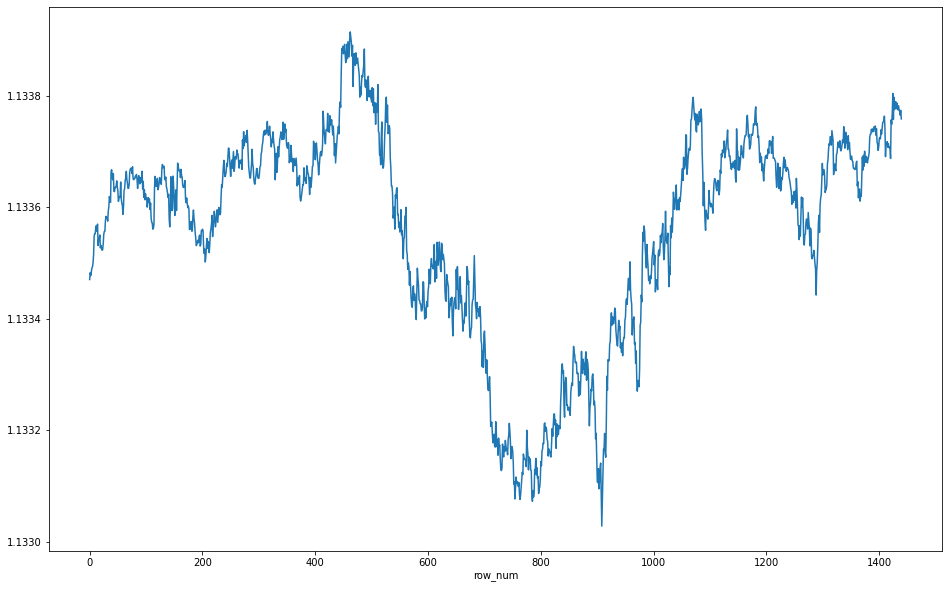

In [57]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 